###  크롤링
- 웹 페이지를 그대로 가져와서 가져온 페이지에서 데이터를 추출해 내는 행위

### Requests 사용법

In [2]:
# 서버에 페이지 정보를 요청할 때 사용하는 라이브러리
import requests as req

In [3]:
url ='https://www.naver.com/'
res = req.get(url)
res
# <Response [200]> : 응답에 성공했다는 의미

<Response [200]>

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="광주날씨 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'광주날씨\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'광주날씨\'의 네이버 통합검색 결과입니다."> <title>광주날씨 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211216.css"> <link rel="stylesheet" type="text/css" 
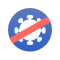
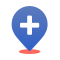
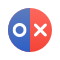
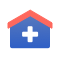

In [31]:
# html 코드 정보 보기
res.text

### BeautifulSoup 사용하기
-- 가져온 html 코드에서 내가 원하는 내용만 추출할때 사용

In [29]:
from bs4 import BeautifulSoup as bs

In [63]:
# 파싱 bs(파싱할 데이터, 파싱방법)
soup = bs(res.text, 'lxml')

In [64]:
soup.select_one("a.nav")

In [65]:
soup.select("a.nav")[2].text

IndexError: list index out of range

#### 광주날씨 크롤링

In [66]:
weather ='https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8'
res = req.get(weather)

In [67]:
soup = bs(res.text, 'lxml')

In [68]:
soup.select("div.temperature_text > strong")[0].text

'현재 온도7°'

#### 멜론차트 수집

In [69]:
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}

In [70]:
url = 'https://www.melon.com/chart/index.htm'
res = req.get(url,headers = h)
res # <Response [406] : 응답 실패

<Response [200]>

In [146]:
soup = bs(res.text, 'lxml')

In [147]:
# for i in range(1,101):
#     print(i)
title = soup.select("div.ellipsis.rank01 > span > a")

In [148]:
for i in title:
    print(i.text)

Counting Stars (Feat. Beenzino)
사랑은 늘 도망가
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
리무진 (Feat. MINO) (Prod. GRAY)
겨울잠
ELEVEN
취중고백
만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)
눈이 오잖아(Feat.헤이즈)
Dreams Come True
드라마
strawberry moon
다정히 내 이름을 부르면
Savage
불협화음 (Feat. AKMU) (Prod. GRAY)
신호등
STAY
이제 나만 믿어요
Next Level
흰눈
네가 없는 밤 (Feat. ASH ISLAND) (Prod. GRAY)
쉬어 (Feat. MINO) (Prod. GRAY)
그대라는 사치
너를 생각해
정거장
Wake Up (Prod. 코드 쿤스트)
다시 사랑한다면 (김필 Ver.)
별빛 같은 나의 사랑아
Butter
Step Back
Christmas Tree
OHAYO MY NIGHT
Permission to Dance
문득
잊었니
HERO
My Universe
낙하 (with 아이유)
바라만 본다
Dynamite
끝사랑
우리가 헤어져야 했던 이유
러브레터
Celebrity
Bk Love
Weekend
그게 더 편할 것 같아 (N번째 연애 X 멜로망스)
헤픈 우연
Still I Love You
라일락
너
Bad Habits
밤하늘의 별을(2020)
서랍
고백
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
찰나가 영원이 될 때 (The Eternal Moment)
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)
MBTI (Feat. 쿠기 & 로꼬) (Prod. GRAY)
이별후회
모든 날, 모든 순간 (Every day, Every Moment)
롤린 (Rollin')
추억은 만남보다 이별에 남아
내 손을 잡아
안녕 우린 헤어져야만 해
밝게 빛나는 별이 되어 비춰줄게
시간을 거슬러 (낮에 뜨는 달 X 케이윌)
Dun Dun D

In [188]:
singer = soup.select("div.ellipsis.rank02 > a:nth-child(1)")
for i in singer:
    print(i.text)


BE'O (비오)
임영웅
sokodomo
BE'O (비오)
아이유
IVE (아이브)
김민석 (멜로망스)
베이식 (Basick)
이무진
aespa
아이유
아이유
경서예지
aespa
Mudd the student
이무진
The Kid LAROI
임영웅
aespa
먼데이 키즈 (Monday Kiz)
BE'O (비오)
아넌딜라이트(Anandelight)
임영웅
주시크 (Joosiq)
아이유
개코
임영웅
임영웅
방탄소년단
GOT the beat
V
디핵 (D-Hack)
방탄소년단
BE'O (비오)
임영웅
임영웅
Coldplay
AKMU (악뮤)
MSG워너비(M.O.M)
방탄소년단
임영웅
비비 (BIBI)
아이유
아이유
임영웅
태연 (TAEYEON)
멜로망스
헤이즈 (Heize)
토요태
아이유
아이유
Ed Sheeran
경서
10CM
멜로망스
AKMU (악뮤)
마크툽 (MAKTUB)
호미들
BE'O (비오)
김나영
폴킴
브레이브걸스
정동하
아이유
전상근
송이한
케이윌
오마이걸 (OH MY GIRL)
다비치
임영웅
Sia
방탄소년단
방탄소년단
아이유
조정석
Justin Bieber
마크툽 (MAKTUB)
헤이즈 (Heize)
MC몽
Red Velvet (레드벨벳)
MINO (송민호)
전소미
조광일
Jawsh 685
ASH ISLAND
성시경
Ariana Grande
산들
케이시 (Kassy)
쿤타
존박
이예준
방탄소년단
이무진
이승윤
STAYC(스테이씨)
Mariah Carey
Justin Bieber
염따
아이유


In [189]:
len(title)

100

In [190]:
len(singer)

100

In [192]:
title[0].text

'Counting Stars (Feat. Beenzino)'

In [207]:
title_list = []
singer_list = []
rank_list = []

for i in range(len(title)):
    title_list.append(title[i].text)
    singer_list.append(singer[i].text)
    rank_list.append(i+1)
    

In [191]:
import pandas as pd

In [208]:
dic = {'노래제목': title_list, '가수' : singer_list, '순위' : rank_list}

In [209]:
df = pd.DataFrame(dic)

In [210]:
df.set_index('순위', inplace = True)
df

,노래제목,가수
순위,,
1,Counting Stars (Feat. Beenzino),BE'O (비오)
2,사랑은 늘 도망가,임영웅
3,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo
4,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오)
5,겨울잠,아이유
...,...,...
96,ASAP,STAYC(스테이씨)
97,All I Want for Christmas Is You,Mariah Carey
98,Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber
